In [15]:
import pandas as pd
import numpy as np
df = pd.read_csv('heart_disease_patients.csv')
data = df
print(df.head())

   id  age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak   
0   1   63    1   1       145   233    1        2      150      0      2.3  \
1   2   67    1   4       160   286    0        2      108      1      1.5   
2   3   67    1   4       120   229    0        2      129      1      2.6   
3   4   37    1   3       130   250    0        0      187      0      3.5   
4   5   41    0   2       130   204    0        2      172      0      1.4   

   slope  
0      3  
1      2  
2      2  
3      3  
4      1  


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        303 non-null    int64  
 1   age       303 non-null    int64  
 2   sex       303 non-null    int64  
 3   cp        303 non-null    int64  
 4   trestbps  303 non-null    int64  
 5   chol      303 non-null    int64  
 6   fbs       303 non-null    int64  
 7   restecg   303 non-null    int64  
 8   thalach   303 non-null    int64  
 9   exang     303 non-null    int64  
 10  oldpeak   303 non-null    float64
 11  slope     303 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 28.5 KB


In [ ]:
'''
1. age - age of patient
2. sex - sex of patient (bool)
3. cp - Chest pain type (categorical)
4. trestbps - Resting blood pressure mm HG
5. chol - Serum cholesterol mg/dl
6. fbs - Fasting blood sugar > 120 mg/dl (bool)
7. restecg - Resting electrocardiographic results (bool)
8. thalach - Maximum heart rate achieved
9. exang - Exercise induced angina (bool)
10. oldpeak - ST depression induced by exercise relative to rest
11. slope - The slope of the peak exercise ST segment
'''

In [3]:
df.isnull().sum()

id          0
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
dtype: int64

array([[<Axes: title={'center': 'id'}>, <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'sex'}>],
       [<Axes: title={'center': 'cp'}>,
        <Axes: title={'center': 'trestbps'}>,
        <Axes: title={'center': 'chol'}>],
       [<Axes: title={'center': 'fbs'}>,
        <Axes: title={'center': 'restecg'}>,
        <Axes: title={'center': 'thalach'}>],
       [<Axes: title={'center': 'exang'}>,
        <Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'slope'}>]], dtype=object)

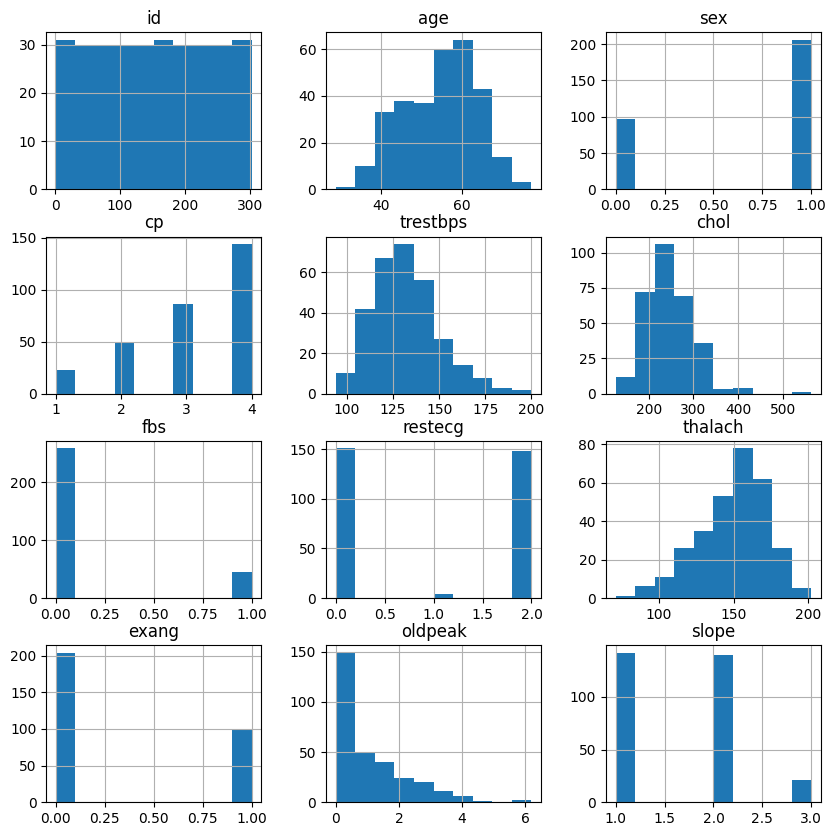

In [4]:
df.hist(figsize=(10,10))

In [5]:
import seaborn as sns

In [10]:
# dorping id column because it holds no information
def remove_id(df):
    df = df.drop('id', axis=1)
    return df

In [11]:
df = remove_id(df)

<Axes: >

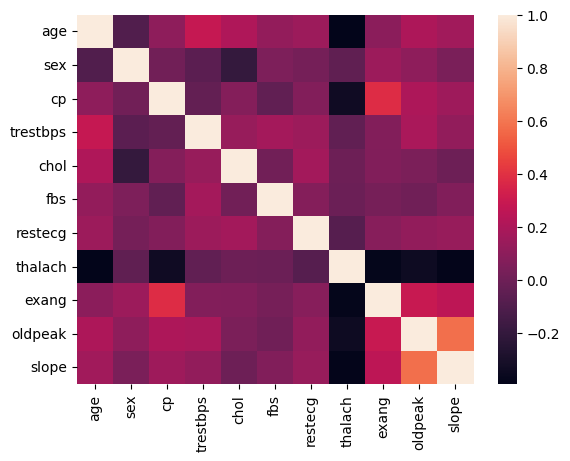

In [14]:
sns.heatmap(df.corr())

In [ ]:
# slope should be dropped
def remove_slope(df):
    df = df.drop('id', axis=1)
    return df

In [107]:
# outliers removal - replace lower_bound upper_bound 
def replace_outliers(data, k=1.5):
    for col in data.columns:
        q1, q3 = np.percentile(data[col], [25, 75])
        iqr = q3 - q1
        lower_bound = q1 - k * iqr
        upper_bound = q3 + k * iqr
        mask = (data[col] < lower_bound) 
        data.loc[mask, col] = lower_bound
        mask = (data[col] > upper_bound)
        data.loc[mask, col] = upper_bound
    return data

In [108]:
replace_outliers(df)

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope
0,1,63.0,1.0,1.5,145,233,0,2,150.0,0.0,2.3,3.0
1,2,67.0,1.0,4.0,160,286,0,2,108.0,1.0,1.5,2.0
2,3,67.0,1.0,4.0,120,229,0,2,129.0,1.0,2.6,2.0
3,4,37.0,1.0,3.0,130,250,0,0,187.0,0.0,3.5,3.0
4,5,41.0,0.0,2.0,130,204,0,2,172.0,0.0,1.4,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
298,299,45.0,1.0,1.5,110,264,0,0,132.0,0.0,1.2,2.0
299,300,68.0,1.0,4.0,144,193,0,0,141.0,0.0,3.4,2.0
300,301,57.0,1.0,4.0,130,131,0,0,115.0,1.0,1.2,2.0
301,302,57.0,0.0,2.0,130,236,0,2,174.0,0.0,0.0,2.0


In [17]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [21]:
X = data.iloc[:,1:-1]
calc_vif(X)

,variables,VIF
0,age,38.767702
1,sex,3.237242
2,cp,12.890330
3,trestbps,58.359328
4,chol,26.212802
5,fbs,1.220425
6,restecg,2.120127
7,thalach,33.521047
8,exang,2.003689
9,oldpeak,2.224328


In [111]:
# X = data.drop(['age', 'trestbps', 'thalach', 'chol'],axis=1)
# calc_vif(X)

In [112]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

def remove_overshadowing(df):
    # Save the column names
    column_names = df.columns.tolist()
    
    # Standardize the data
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(df)

    # Perform PCA
    pca = PCA()
    X_pca = pca.fit_transform(X_scaled)

    # Determine the number of principal components to retain
    explained_variances = pca.explained_variance_ratio_
    cumulative_variances = np.cumsum(explained_variances)
    n_components = np.argmax(cumulative_variances > 0.95) + 1

    # Retain the first n principal components
    X_reduced = X_pca[:, :n_components]

    # Convert back to a pandas DataFrame
    df_reduced = pd.DataFrame(X_reduced, columns=["PC"+str(i) for i in range(1, n_components+1)])
    
    # Restore the column names
    df_reduced.columns = column_names[:n_components]
    
    return df_reduced



In [113]:
df = remove_id(df)

In [114]:
remove_overshadowing(df)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang
0,1.170095,0.704664,3.156552,-0.095923,0.614778,0.582985,-0.789547,0.450709,0.000632
1,3.189919,0.928792,-0.156836,-0.805134,-1.289344,-0.170332,0.126702,0.408766,-0.649265
2,2.649414,-0.746624,-0.174840,-0.500296,-0.246012,0.884654,-0.322103,0.046939,1.178877
3,0.105144,-1.494090,2.092199,0.203457,2.576629,-1.908552,-0.475507,-1.153739,0.039736
4,-1.890351,0.423066,0.763034,-0.245014,1.421581,0.476898,1.213161,0.625265,0.521988
...,...,...,...,...,...,...,...,...,...
298,-0.876117,-1.033291,0.901518,0.693958,0.765530,0.061638,-1.989688,0.854893,-0.995663
299,1.761731,-0.491844,1.452806,1.308181,-0.904039,-0.234930,0.000926,-1.773532,0.849545
300,1.533710,-2.427671,0.091745,1.106639,-1.419283,0.368879,1.046119,0.529148,0.017017
301,-1.183486,1.415926,0.736945,0.178162,1.092854,1.032314,0.466761,0.784749,0.295027
